# Dogs Breeds Dataset

## Description

This notebook provides a simple data characterization of the training data provided in Dog Breeds Dataset.

This is an important step in the ML process to undestand the data used to train our model. It's in here where we can observe some intrinsic data characteristics that guide our deicision for the rest of the training procedure. 

In [47]:
# Imports come here
import os
from collections import Counter, OrderedDict

import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Loading training data

The first step is to load the training data and to perform such a task we defined a utility function to navigate trhough the folders and get the images' filenames.

In [48]:
def get_data(root_dir):
    data, labels = [], []
    for root, dirs, files in os.walk(root_dir):
        if len(dirs) == 0:
            label = root.split(os.sep)[-1][10:].lower().replace('_', ' ').capitalize()
            for f in files:
                data.append(os.path.join(root, f))
                labels.append(label)

    return np.array(data), np.array(labels)

In [49]:
data, labels = get_data('./data/dogs/train')
print(f'Loaded {len(data)} training instances')

Loaded 17345 training instances


## Cheking class distributions

An unbalanced dataset can become extremlly challenging to properly train and identify unbalacement early can be very helpful to save time trying to tune a ML model when the problem is in the data.

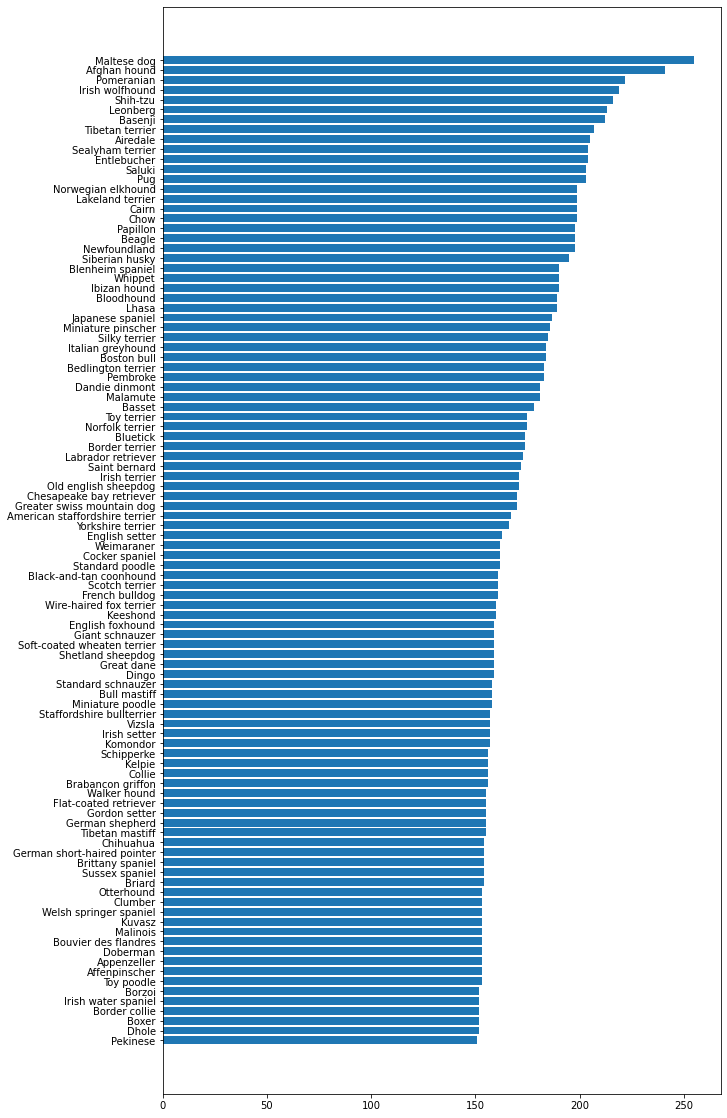

In [51]:
breeds = OrderedDict(Counter(labels).most_common()[::-1])
plt.figure(figsize=(10, 20))
plt.barh(list(breeds.keys()), breeds.values())
plt.show()

In [55]:
counts = np.array(list(breeds.values()))

print(f'Min:\t{np.min(counts)}')
print(f'Mean:\t{np.mean(counts)}')
print(f'Std:\t{np.std(counts)}')
print(f'Max:\t{np.max(counts)}')

Min:	151
Mean:	173.45
Std:	22.30756598107467
Max:	255


As we can observe, the **Maltese dog** and some other breeds have more instances than 1 standard deviation from the data's mean. At first this might not be a problem. However, it's good to keep an eyes during the training procedure to check if these classes are dominating the others.